In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import os

from utils.plotter import Plotter
from utils.data_handler import DataHandler
from utils import get_diagnostics, get_rmses

output_folder = "./dcsm/output"
npart = 12

In [5]:
map_file = os.path.join(output_folder, f"DCSM-FM_0_5nm_{0:04}_map.nc")
xr.open_dataset(map_file)

<xarray.Dataset>
Dimensions:                   (mesh2d_nNodes: 50419, mesh2d_nEdges: 99405,
                               Two: 2, mesh2d_nFaces: 48949,
                               mesh2d_nMax_face_nodes: 4, time: 73)
Coordinates:
    mesh2d_node_x             (mesh2d_nNodes) float64 ...
    mesh2d_node_y             (mesh2d_nNodes) float64 ...
    mesh2d_edge_x             (mesh2d_nEdges) float64 ...
    mesh2d_edge_y             (mesh2d_nEdges) float64 ...
    mesh2d_face_x             (mesh2d_nFaces) float64 ...
    mesh2d_face_y             (mesh2d_nFaces) float64 ...
  * time                      (time) datetime64[ns] 2012-12-22 ... 2012-12-23
Dimensions without coordinates: mesh2d_nNodes, mesh2d_nEdges, Two,
                                mesh2d_nFaces, mesh2d_nMax_face_nodes
Data variables: (12/18)
    wgs84                     int32 ...
    mesh2d                    int32 ...
    mesh2d_node_z             (mesh2d_nNodes) float64 ...
    mesh2d_edge_nodes         (mesh2d_nEdges, Two) int32 ...
    mesh2d_face_nodes         (mesh2d_nFaces, mesh2d_nMax_face_nodes) float64 ...
    mesh2d_edge_faces         (mesh2d_nEdges, Two) float64 ...
    ...                        ...
    mesh2d_flowelem_globalnr  (mesh2d_nFaces) float64 ...
    timestep                  (time) float64 ...
    mesh2d_s1                 (time, mesh2d_nFaces) float64 ...
    mesh2d_ucx                (time, mesh2d_nFaces) float64 ...
    mesh2d_ucy                (time, mesh2d_nFaces) float64 ...
    mesh2d_ucmag              (time, mesh2d_nFaces) float64 ...
Attributes: (12/18)
    institution:               Deltares
    references:                http://www.deltares.nl
    source:                    D-Flow FM 1.2.177.142431. Model:
    history:                   Created on 2023-10-03T14:41:49+0200, D-Flow FM
    date_created:              2023-10-03T14:41:49+0200
    date_modified:             2023-10-03T14:41:49+0200
    ...                        ...
    geospatial_lon_max:        -2.3874999999999984
    geospatial_lon_units:      degrees_east
    time_coverage_start:       2012-12-22T**:00:00+00:00
    time_coverage_end:         2012-12-23T**:00:00+00:00
    time_coverage_duration:    P0000-00-01T00:00:00
    time_coverage_resolution:  P0000-00-00T00:20:00

<Figure size 640x480 with 0 Axes>

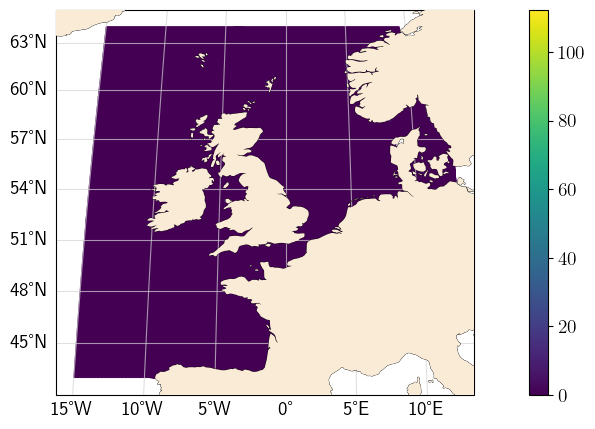

<Figure size 640x480 with 0 Axes>

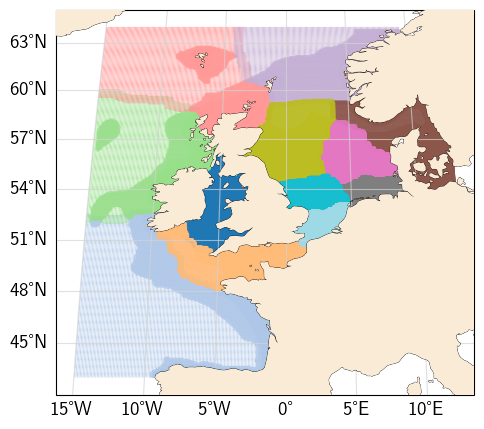

In [10]:
t = 0

vars = ["mesh2d_s1"]
# vars = ["s1", "waterdepth", "TidalPotential_without_SAL", "SALPotential", "ucx", "ucy"]
for var in vars:
    x = np.array([])
    y = np.array([])
    z = np.array([])
    z_dom = np.array([])
    for i in range(npart):
        map_file = os.path.join(output_folder, f"DCSM-FM_0_5nm_{i:04}_map.nc")
        nc = xr.load_dataset(map_file)
        x = np.hstack((x, nc.mesh2d_face_x))
        y = np.hstack((y, nc.mesh2d_face_y))

        z_vals = getattr(nc, var)[t, :]
        extend = None
        if var == "s1":
            z_vals = np.minimum(z_vals, 2.5)
            extend = "max"
        z = np.hstack((z, z_vals))
        z_dom = np.hstack((z_dom, i * np.ones_like(z_vals)))

    Plotter.plot_map(
        x,
        y,
        z,
        size_lims=(0.01, 3),
        flip_lims=True,
        path=f"{var}_t{t}.png",
    )
plt.show()
Plotter.plot_map(
    x,
    y,
    z_dom,
    size=0.5,
    path="domains.png",
    cmap="tab20",
    draw_colorbar=False,
)
plt.show()

<Figure size 640x480 with 0 Axes>

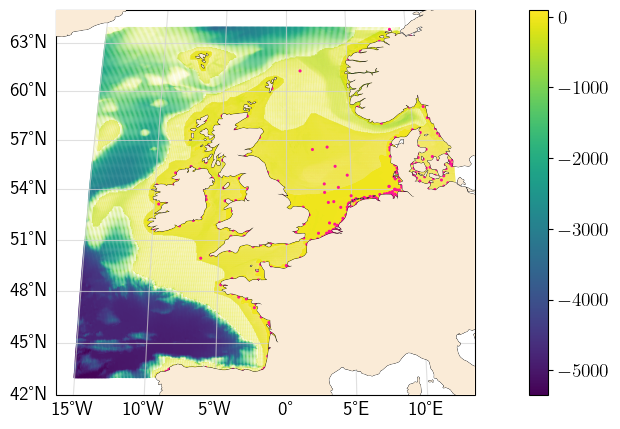

In [15]:
locs_file = "/home/mverlaan/einf220/fromDavid/dcsm_openDA_david/stochModel/input_dflowfm/geometry/output_locations/DCSM-FM_0_5nm_20230125_obs.xyn"

nc = xr.open_dataset(
    "/home/mverlaan/einf220/fromDavid/dcsm_openDA_david/stochModel/input_dflowfm/DCSM-FM_0_5nm_grid_20220310_depth_20220517_net.nc"
).NetNode_z
nc = nc[np.where(nc < 100)]
x = nc.NetNode_x
y = nc.NetNode_y
z = nc

# Read locations
df = pd.read_csv(
    locs_file, delim_whitespace=True, header=None, names=["lon", "lat", "name"]
)
stations = df[["lon", "lat"]].to_numpy()

_, _ = Plotter.plot_map(
    x,
    y,
    z,
    path="bathymetry.png",
    size_lims=(0.0001, 3),
    stations=stations,
)

# _, _ = Plotter.plot_map(
#     x,
#     y,
#     np.zeros_like(x),
#     path="stations.png",
#     size_lims=(0.01, 3),
#     # stations=stations,
# )
plt.show()

In [13]:
xr.open_dataset(
    "/home/mverlaan/einf220/fromDavid/dcsm_openDA_david/stochModel/input_dflowfm/DCSM-FM_0_5nm_grid_20220310_depth_20220517_net.nc"
).NetNode_z

<xarray.DataArray 'NetNode_z' (nNetNode: 628093)>
[628093 values with dtype=float64]
Coordinates:
    NetNode_x  (nNetNode) float64 ...
    NetNode_y  (nNetNode) float64 ...
Dimensions without coordinates: nNetNode
Attributes:
    units:          m
    positive:       up
    standard_name:  sea_floor_depth
    long_name:      bed level at net nodes (flow element corners)
    mesh:           Mesh2D
    location:       node